# Download Images from Kaggle-->>

In [2]:
import kagglehub
dataset = kagglehub.dataset_download('ashishsaxena2209/animal-image-datasetdog-cat-and-panda')

print('Images download done.')

Images download done.


# Import libraries
```



In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

# Images Category

In [4]:

print(os.listdir(dataset))

['animals', 'images']


In [5]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['animals', 'images', 'dogs', 'panda', 'cats']


In [6]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['dogs', 'panda', 'cats']


In [7]:
categories = os.listdir(dataset)
print(categories)

['dogs', 'panda', 'cats']


In [8]:
print ([os.listdir(os.path.join(dataset, category)) for category in categories])

[['dogs_00583.jpg', 'dogs_00683.jpg', 'dogs_00750.jpg', 'dogs_00652.jpg', 'dogs_00895.jpg', 'dogs_00686.jpg', 'dogs_00622.jpg', 'dogs_00291.jpg', 'dogs_00944.jpg', 'dogs_00082.jpg', 'dogs_00955.jpg', 'dogs_00309.jpg', 'dogs_00253.jpg', 'dogs_00416.jpg', 'dogs_00646.jpg', 'dogs_00463.jpg', 'dogs_00688.jpg', 'dogs_00732.jpg', 'dogs_00137.jpg', 'dogs_00602.jpg', 'dogs_00647.jpg', 'dogs_00976.jpg', 'dogs_00636.jpg', 'dogs_00226.jpg', 'dogs_00359.jpg', 'dogs_00684.jpg', 'dogs_00370.jpg', 'dogs_00676.jpg', 'dogs_00500.jpg', 'dogs_00716.jpg', 'dogs_00294.jpg', 'dogs_00041.jpg', 'dogs_00544.jpg', 'dogs_00124.jpg', 'dogs_00429.jpg', 'dogs_00279.jpg', 'dogs_00821.jpg', 'dogs_00957.jpg', 'dogs_00846.jpg', 'dogs_00843.jpg', 'dogs_00391.jpg', 'dogs_00519.jpg', 'dogs_00452.jpg', 'dogs_00618.jpg', 'dogs_00875.jpg', 'dogs_00381.jpg', 'dogs_00692.jpg', 'dogs_00917.jpg', 'dogs_00167.jpg', 'dogs_00122.jpg', 'dogs_00473.jpg', 'dogs_00625.jpg', 'dogs_00753.jpg', 'dogs_00835.jpg', 'dogs_00660.jpg', 'dogs_00

# Train Images

In [9]:
import random

train_data = []


for index, category in enumerate(categories):
    label = index
    path = os.path.join(dataset, category)
    images = os.listdir(path)
    random.shuffle(images)


    for img in images[:100]:
        img_path = os.path.join(path, img)
        img_bgr = cv2.imread(img_path)
        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        img_gray = cv2.resize(img_gray, (32, 32))
        train_data.append([img_gray, label])


The program prepares the training data by processing images from different categories (like 'dogs', 'cats', and 'pandas'). It starts by creating an empty list called `train_data`, which will hold the image data and their labels. For each category, it gets the file path, retrieves the list of images, and shuffles them to ensure randomness. It then selects the first 100 images from the shuffled list.

For each of these 100 images, the code reads the image, converts it to grayscale (removing color information), and resizes it to a standard 100x100 size. The processed image is then paired with its corresponding label (based on the category) and added to the `train_data` list. This results in a total of 300 images (100 per category), all ready to be used for training the model.


In [10]:
#the code shuffles the `train_data` list and then prints the labels of the first 10 images after the shuffle, showing the class labels of those images.
np.random.shuffle(train_data)
print ([train_data[i][1] for i in range(10)])

[0, 0, 2, 2, 0, 0, 2, 0, 1, 2]


# Show the Images

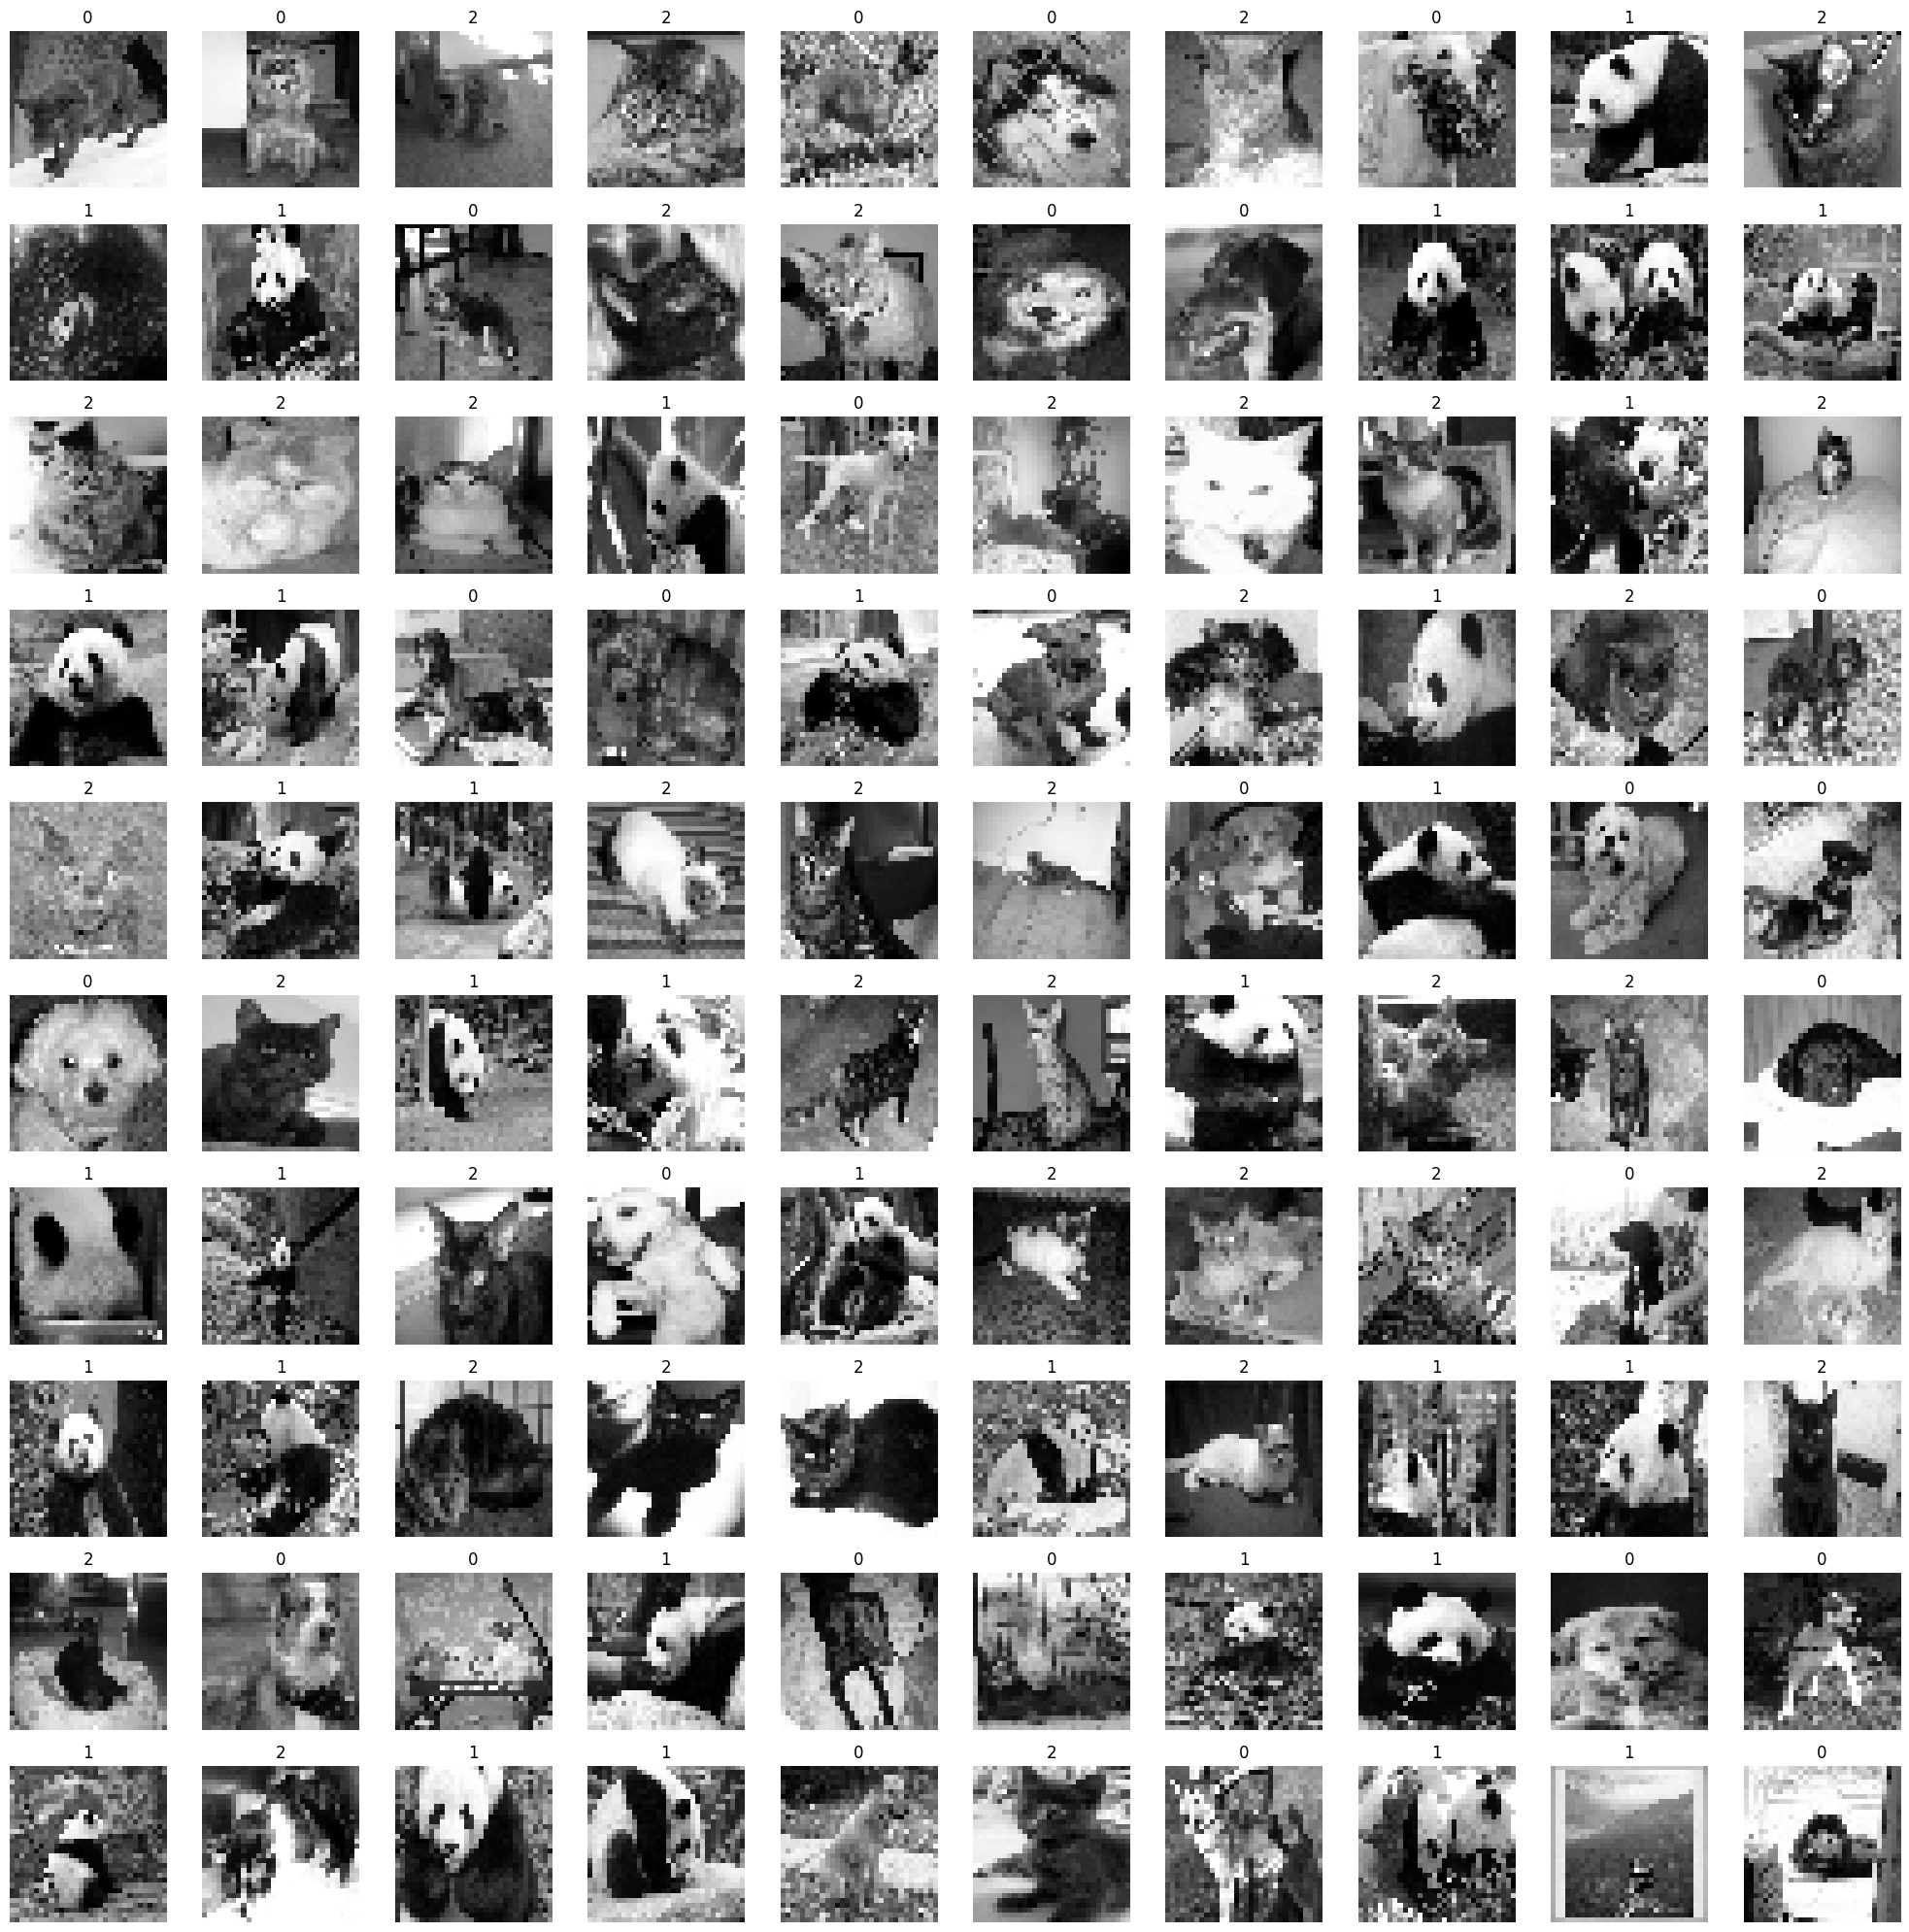

In [11]:
fig, axes = plt.subplots(10, 10, figsize=(20, 20))

for i, ax in enumerate(axes.flat):
    img_array, label = train_data[i]
    ax.imshow(img_array, cmap="gray")
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()


Display a set of images from the dataset, each with its associated label (representing the animal type: dog, cat, or panda). This code cell is using Matplotlib to visualize a collection of grayscale images in a 3x3 grid, where each image is displayed along with its label. The images are shown in their raw grayscale format, and the labels (0, 1, or 2) are set based on the animal type for each image.

The code iterates through the dataset (train_data), using a loop to plot each image in a grid with the corresponding label displayed as the title of each image. The ax.set_title(label) function sets the title of each plot to the respective animal's label, allowing us to visualize the images and match them with their labels. The images displayed here belong to different animal classes—dogs, cats, and pandas—labeled with "0" for dogs, "1" for cats, and "2" for pandas. This setup is a typical part of data visualization to better understand how the model is interpreting different animal images and which class it associates each image with.

Separate Images

In [12]:
#the train_data is being divided into 5 folds for cross-validation
folds = []
for i in range(5):
    folds.append(train_data[i::5])

len(folds)


5

In [13]:
# Iterate through each fold, extract labels, and print the fold number and its labels
for fold_index in range(len(folds)):
    fold = folds[fold_index]  # Get the current fold
    labels = [label for _, label in fold]  # Extract labels from the fold
    print(f"Fold {fold_index + 1}:")  # Print the current fold number
    print(f"Labels: {labels}")  # Print the labels of the current fold


Fold 1:
Labels: [0, 0, 1, 0, 2, 2, 1, 0, 2, 2, 0, 2, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 2, 0, 1, 1, 0, 1, 2, 2, 1, 0]
Fold 2:
Labels: [0, 2, 1, 0, 2, 2, 1, 2, 1, 0, 2, 1, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 1, 2, 2, 0, 0, 2, 0, 1, 2, 0, 1, 0, 0, 2, 2, 0, 2, 1, 2, 0, 2, 1, 0, 0, 2, 1, 0, 2, 2, 1, 0, 1, 0, 0, 1, 2, 1, 2]
Fold 3:
Labels: [2, 0, 0, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 2, 0, 0, 0, 1, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 1, 1]
Fold 4:
Labels: [2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 1, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1, 2]
Fold 5:
Labels: [0, 2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 2, 0, 2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2]


In [14]:
def l2_distance(valid_img, train_img):
    # Calculate the element-wise difference between the two images
    difference = valid_img - train_img

    # Square each of the differences to eliminate negative signs
    squared_difference = np.square(difference)

    # Sum up all the squared differences to get a total
    summed_squares = np.sum(squared_difference)

    # Take the square root of the sum of squared differences to compute the Euclidean distance
    distance = np.sqrt(summed_squares)

    # Return the Euclidean distance
    return distance


def l1_distance(valid_img, train_img):
    # Calculate the element-wise absolute difference between the two images
    difference = np.abs(valid_img - train_img)

    # Sum up all the absolute differences to get the Manhattan distance
    distance = np.sum(difference)

    # Return the Manhattan distance
    return distance


In [15]:
from collections import Counter  # Importing the Counter class to count the occurrences of labels

def knn_prediction(distances, k=1):
    # Get the k nearest neighbors based on the provided distances
    nearest_neighbors = distances[:k]

    # Extract the labels of the nearest neighbors
    labels = [label for _, label in nearest_neighbors]

    # Count the occurrences of each label using Counter
    label_counts = Counter(labels)

    # Get the most common label (the one that appears most frequently among the nearest neighbors)
    most_common_label = label_counts.most_common(1)[0][0]

    # Return the most common label as the predicted label
    return most_common_label




Accuracy calculate

> Add blockquote



In [16]:
fold_accuracies_2 = []  # List to store accuracies for each fold and each value of k
avg_accuracies_2 = []  # List to store average accuracy for each value of k

# Loop through different values of k (1 to 30 for k-NN)
for k in range(1, 31):
    accuracies = []  # List to store accuracy for each fold for a particular value of k

    # Loop over each fold for cross-validation (leave-one-out fold)
    for i in range(len(folds) - 1, -1, -1):
        valid_set = folds[i]  # Select the validation set (current fold)

        # Create the training set by combining all folds except the current validation fold
        train_set = [
            item for j, fold in enumerate(folds) if j != i for item in fold
        ]

        predictions = []  # List to store the prediction results for the current fold

        # Loop through each image in the validation set
        for valid_img in valid_set:
            # Calculate L2 distances between the validation image and all training images
            l2_distances = [
                (l2_distance(valid_img[0], train_img[0]), train_img[1])
                for train_img in train_set
            ]
            l2_distances.sort()  # Sort the distances in ascending order

            # Use the k-NN prediction function to get the predicted label for the validation image
            predicted_label = knn_prediction(l2_distances, k)
            # Check if the predicted label matches the true label of the validation image
            predictions.append(1 if predicted_label == valid_img[1] else 0)

        # Calculate the accuracy for this fold (percentage of correct predictions)
        fold_accuracy = sum(predictions) / len(predictions)
        accuracies.append(fold_accuracy)

    # Store the accuracies for all folds for the current value of k
    fold_accuracies_2.append(accuracies)
    # Calculate the average accuracy for the current value of k across all folds
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_accuracies_2.append(avg_accuracy)

    # Print the results for the current value of k
    print(f"\nK = {k}:")
    print(f"  Average Accuracy: {avg_accuracy:.2f}")



K = 1:
  Average Accuracy: 0.44

K = 2:
  Average Accuracy: 0.44

K = 3:
  Average Accuracy: 0.46

K = 4:
  Average Accuracy: 0.48

K = 5:
  Average Accuracy: 0.48

K = 6:
  Average Accuracy: 0.50

K = 7:
  Average Accuracy: 0.50

K = 8:
  Average Accuracy: 0.51

K = 9:
  Average Accuracy: 0.47

K = 10:
  Average Accuracy: 0.49

K = 11:
  Average Accuracy: 0.47

K = 12:
  Average Accuracy: 0.49

K = 13:
  Average Accuracy: 0.50

K = 14:
  Average Accuracy: 0.48

K = 15:
  Average Accuracy: 0.47

K = 16:
  Average Accuracy: 0.49

K = 17:
  Average Accuracy: 0.49

K = 18:
  Average Accuracy: 0.50

K = 19:
  Average Accuracy: 0.49

K = 20:
  Average Accuracy: 0.52

K = 21:
  Average Accuracy: 0.53

K = 22:
  Average Accuracy: 0.52

K = 23:
  Average Accuracy: 0.53

K = 24:
  Average Accuracy: 0.53

K = 25:
  Average Accuracy: 0.52

K = 26:
  Average Accuracy: 0.53

K = 27:
  Average Accuracy: 0.53

K = 28:
  Average Accuracy: 0.54

K = 29:
  Average Accuracy: 0.51

K = 30:
  Average Accu

In [17]:
fold_accuracies_1 = []  # List to store accuracies for each fold and each value of k
avg_accuracies_1 = []  # List to store average accuracy for each value of k
# Loop through different values of k (1 to 30 for k-NN)
for k in range(1, 31):
    accuracies = []  # List to store accuracy for each fold for a particular value of k

    # Loop over each fold for cross-validation (leave-one-out fold)
    for i in range(len(folds) - 1, -1, -1):
        valid_set = folds[i]  # Select the validation set (current fold)

        # Create the training set by combining all folds except the current validation fold
        train_set = [
            item for j, fold in enumerate(folds) if j != i for item in fold
        ]

        predictions = []  # List to store the prediction results for the current fold

        # Loop through each image in the validation set
        for valid_img in valid_set:
            # Calculate L1 distances between the validation image and all training images
            l1_distances = [
                (l1_distance(valid_img[0], train_img[0]), train_img[1])
                for train_img in train_set
            ]
            l1_distances.sort()  # Sort the distances in ascending order

            # Use the k-NN prediction function to get the predicted label for the validation image
            predicted_label = knn_prediction(l1_distances, k)
            # Check if the predicted label matches the true label of the validation image
            predictions.append(1 if predicted_label == valid_img[1] else 0)

        # Calculate the accuracy for this fold (percentage of correct predictions)
        fold_accuracy = sum(predictions) / len(predictions)
        accuracies.append(fold_accuracy)

    # Store the accuracies for all folds for the current value of k
    fold_accuracies_1.append(accuracies)
    # Calculate the average accuracy for the current value of k across all folds
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_accuracies_1.append(avg_accuracy)

    # Print the results for the current value of k
    print(f"\nK = {k}:")
    print(f"  Average Accuracy: {avg_accuracy:.2f}")


K = 1:
  Average Accuracy: 0.42

K = 2:
  Average Accuracy: 0.42

K = 3:
  Average Accuracy: 0.36

K = 4:
  Average Accuracy: 0.34

K = 5:
  Average Accuracy: 0.35

K = 6:
  Average Accuracy: 0.36

K = 7:
  Average Accuracy: 0.35

K = 8:
  Average Accuracy: 0.36

K = 9:
  Average Accuracy: 0.38

K = 10:
  Average Accuracy: 0.39

K = 11:
  Average Accuracy: 0.39

K = 12:
  Average Accuracy: 0.38

K = 13:
  Average Accuracy: 0.39

K = 14:
  Average Accuracy: 0.38

K = 15:
  Average Accuracy: 0.40

K = 16:
  Average Accuracy: 0.38

K = 17:
  Average Accuracy: 0.39

K = 18:
  Average Accuracy: 0.38

K = 19:
  Average Accuracy: 0.38

K = 20:
  Average Accuracy: 0.37

K = 21:
  Average Accuracy: 0.36

K = 22:
  Average Accuracy: 0.34

K = 23:
  Average Accuracy: 0.37

K = 24:
  Average Accuracy: 0.37

K = 25:
  Average Accuracy: 0.36

K = 26:
  Average Accuracy: 0.38

K = 27:
  Average Accuracy: 0.37

K = 28:
  Average Accuracy: 0.36

K = 29:
  Average Accuracy: 0.35

K = 30:
  Average Accu

# Show the graph

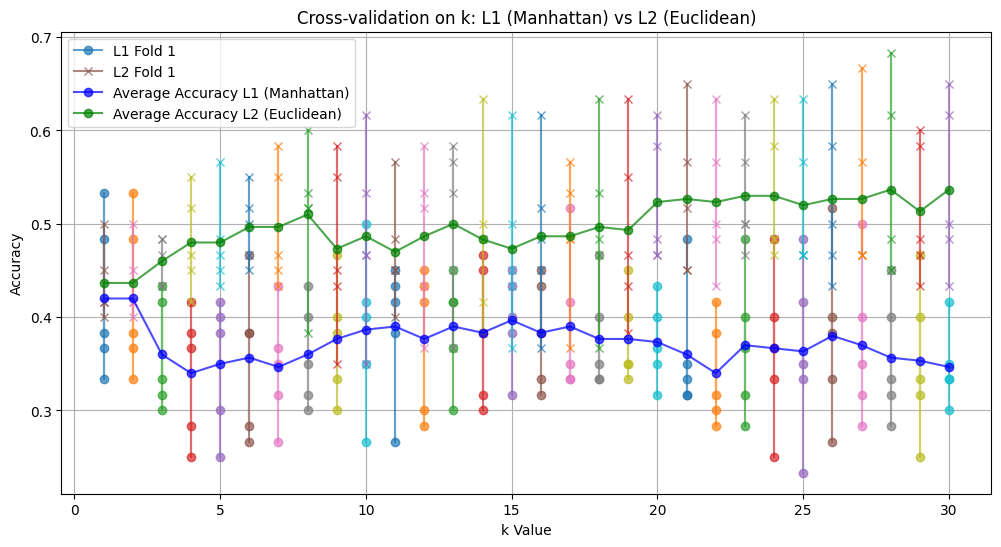

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

# Assuming fold_accuracies_l1 and fold_accuracies_l2 store accuracies for L1 and L2 distances respectively
# And avg_accuracies_l1 and avg_accuracies_l2 store the average accuracies for L1 and L2 distances

colors = plt.cm.tab10.colors

# Loop to plot individual fold accuracies for both L1 (Manhattan) and L2 (Euclidean)
for k in range(30):
    # Plot L1 (Manhattan) fold accuracies
    fold_accuracy_l1 = fold_accuracies_1[k]
    plt.plot([k + 1] * len(fold_accuracy_l1), fold_accuracy_l1, linestyle='-', marker='o', alpha=0.7, color=colors[k % len(colors)], label=f'L1 Fold {k+1}' if k == 0 else "")

    # Plot L2 (Euclidean) fold accuracies
    fold_accuracy_l2 = fold_accuracies_2[k]
    plt.plot([k + 1] * len(fold_accuracy_l2), fold_accuracy_l2, linestyle='-', marker='x', alpha=0.7, color=colors[(k+5) % len(colors)], label=f'L2 Fold {k+1}' if k == 0 else "")

# Plot average accuracies for L1 and L2 distances
plt.plot(range(1, 31), avg_accuracies_1, color='blue', alpha=0.7, label='Average Accuracy L1 (Manhattan)', linestyle='-', marker='o')
plt.plot(range(1, 31), avg_accuracies_2, color='green', alpha=0.7, label='Average Accuracy L2 (Euclidean)', linestyle='-', marker='o')

# Labels and title
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Cross-validation on k: L1 (Manhattan) vs L2 (Euclidean)')

# Show grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.show()


The graph illustrates how the accuracy of the k-NN model varies with different
k values for both Manhattan and Euclidean distances. The key takeaways are:

**Fluctuating Performance:** There are noticeable variations in the performance for each fold and each
k value, which could be influenced by the complexity of the data and the model's ability to generalize. The fluctuations represent how well the model adapts to different data splits across the 5 folds.

**Optimal k Values:** Specific values of
k (e.g.,
k=15) show better generalization, suggesting an optimal trade-off between bias and variance. These values provide the best balance, ensuring that the model captures the decision boundaries while avoiding both overfitting and underfitting.

**Model Stability:** The spread of accuracies across folds gives insights into the model's robustness. The narrower the vertical lines, the more stable the model is across different data splits. This indicates that the model's performance is consistent and reliable, regardless of how the data is partitioned.

**Variation Across 5 Folds:** The vertical lines in the graph indicate the range of accuracy for each fold. Wider lines reflect more variation in accuracy across different folds, suggesting that the model's performance can vary depending on the specific split of the data. This variation provides insights into how sensitive the model is to changes in the data and how it generalizes to new unseen data.

**Choosing the Right Distance Metric:** While both distances are useful, the Euclidean distance (L2) generally provides better performance on average. However, the Manhattan distance (L1) still shows competitive performance at some
k values. This suggests that while the Euclidean distance may offer smoother performance, the Manhattan distance can also be effective, particularly for specific values of
k.

#Top 5 Predication


Fold 1 Top 5 Predictions (Euclidean (L2)):


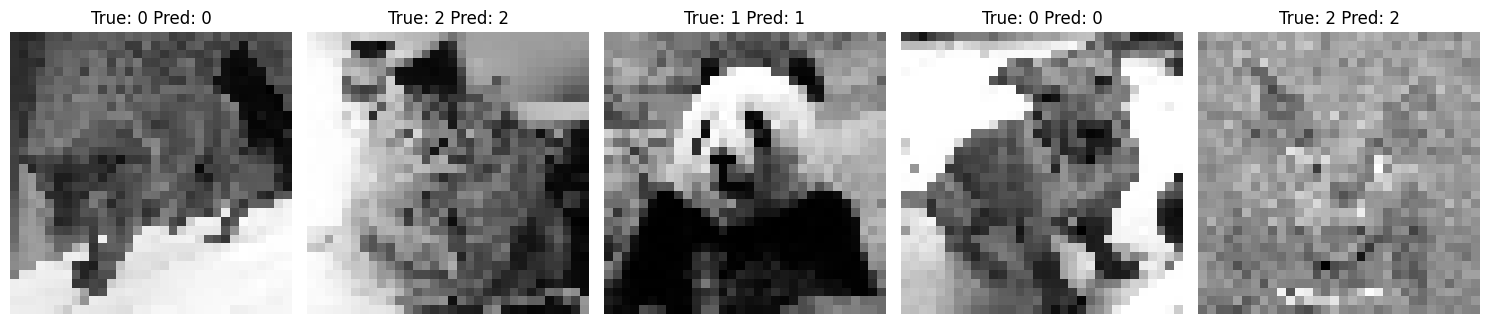


Fold 2 Top 5 Predictions (Euclidean (L2)):


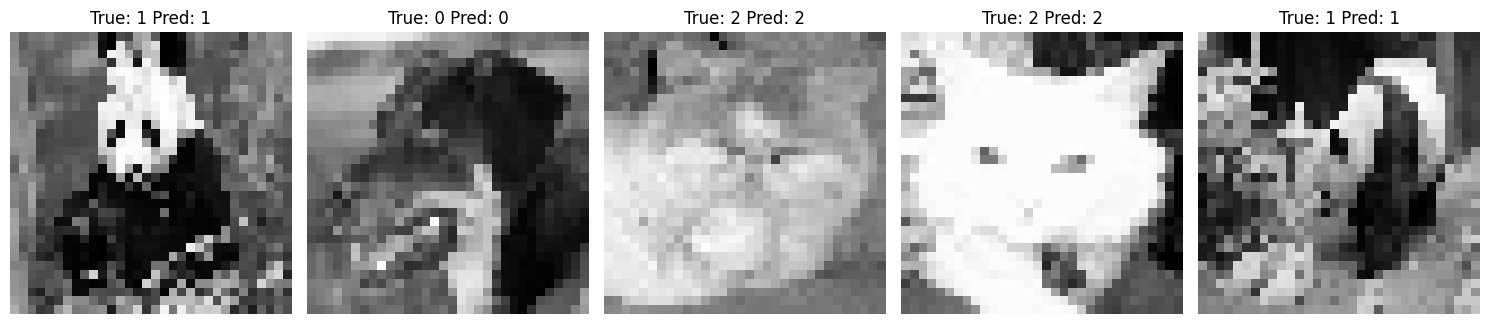


Fold 3 Top 5 Predictions (Euclidean (L2)):


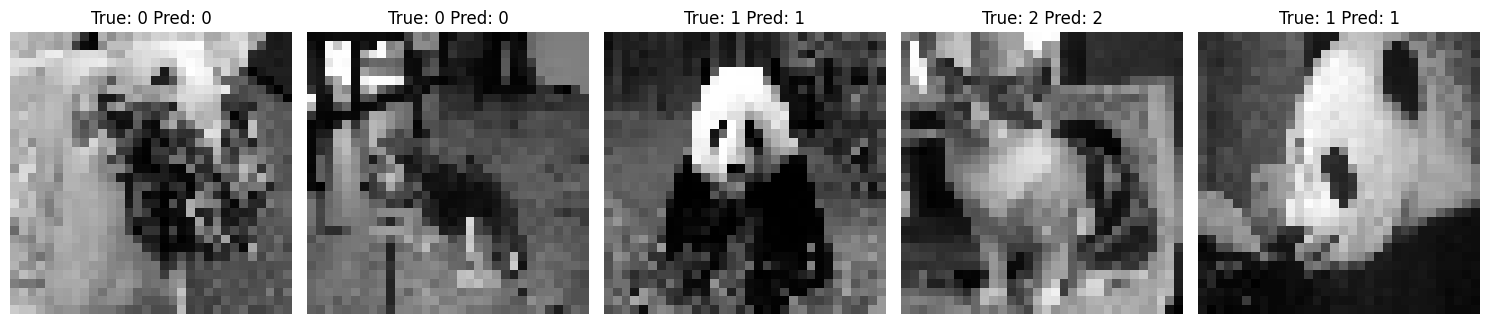


Fold 4 Top 5 Predictions (Euclidean (L2)):


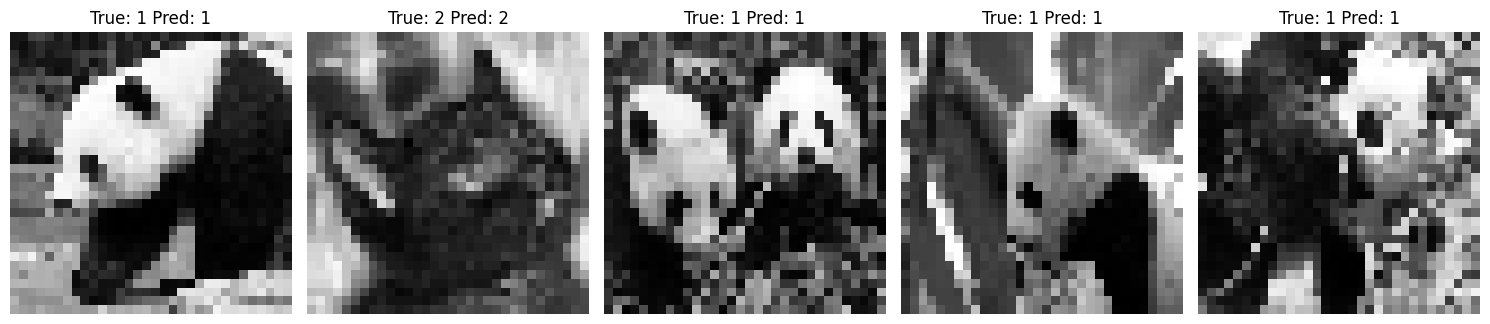


Fold 5 Top 5 Predictions (Euclidean (L2)):


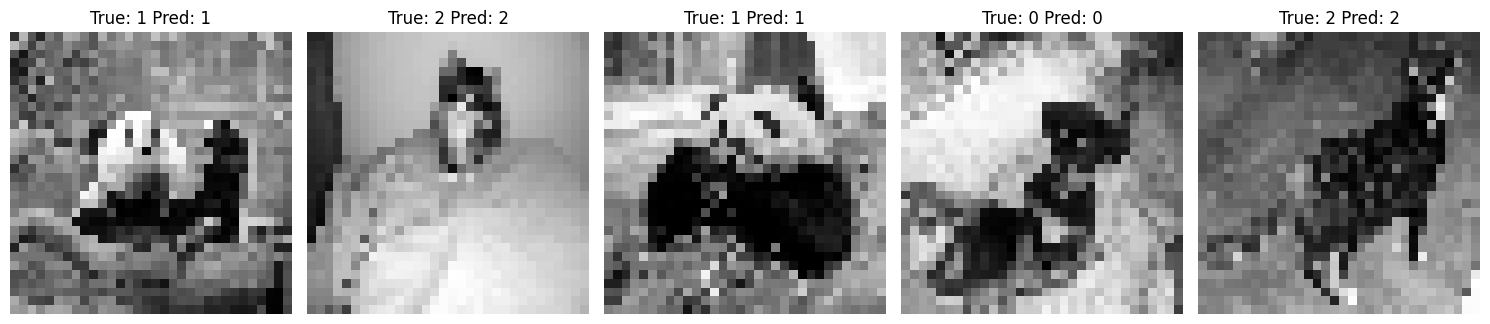


Fold 1 Top 5 Predictions (Manhattan (L1)):


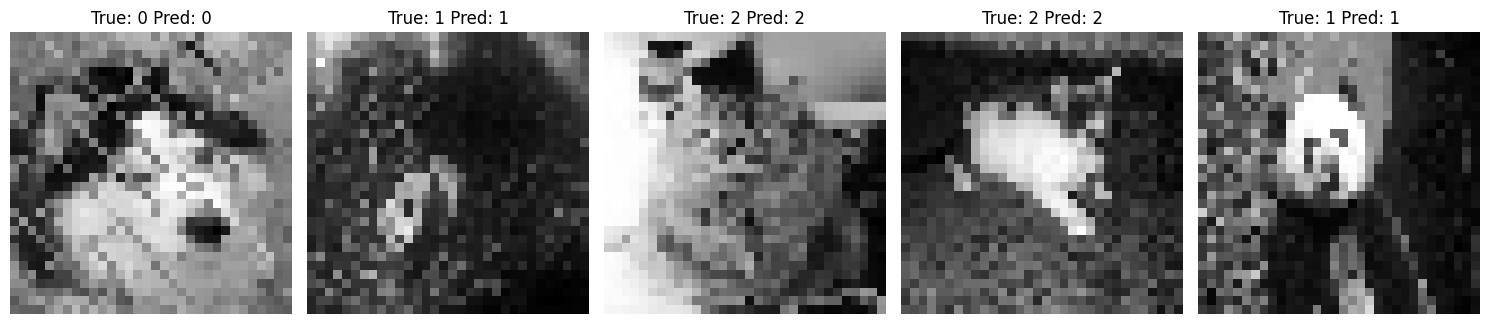


Fold 2 Top 5 Predictions (Manhattan (L1)):


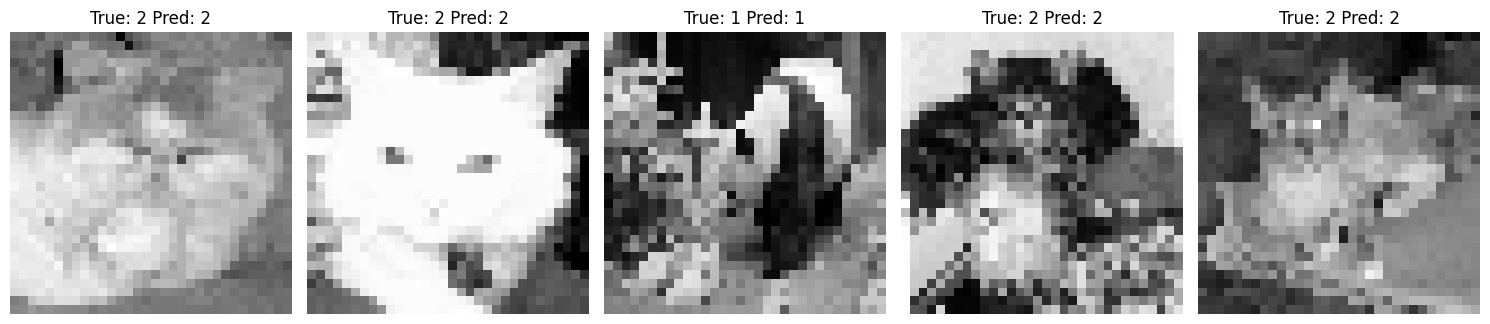


Fold 3 Top 5 Predictions (Manhattan (L1)):


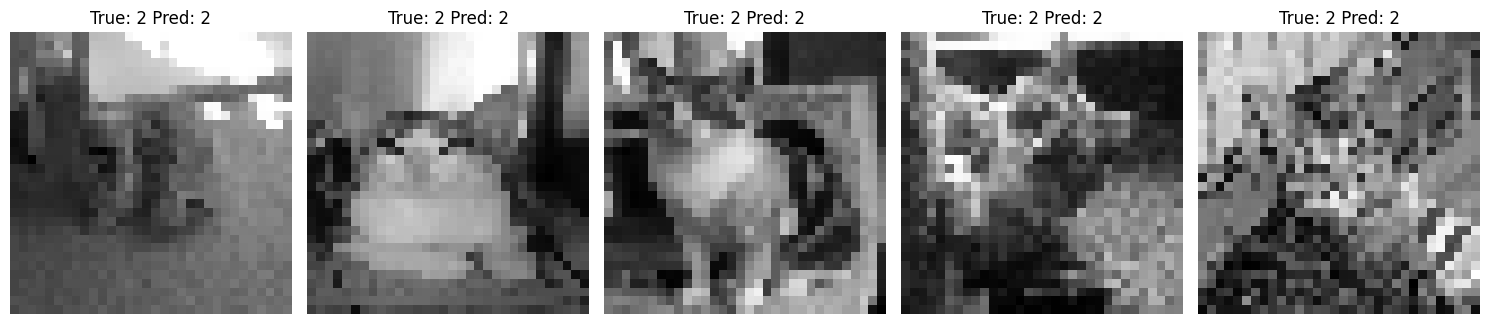


Fold 4 Top 5 Predictions (Manhattan (L1)):


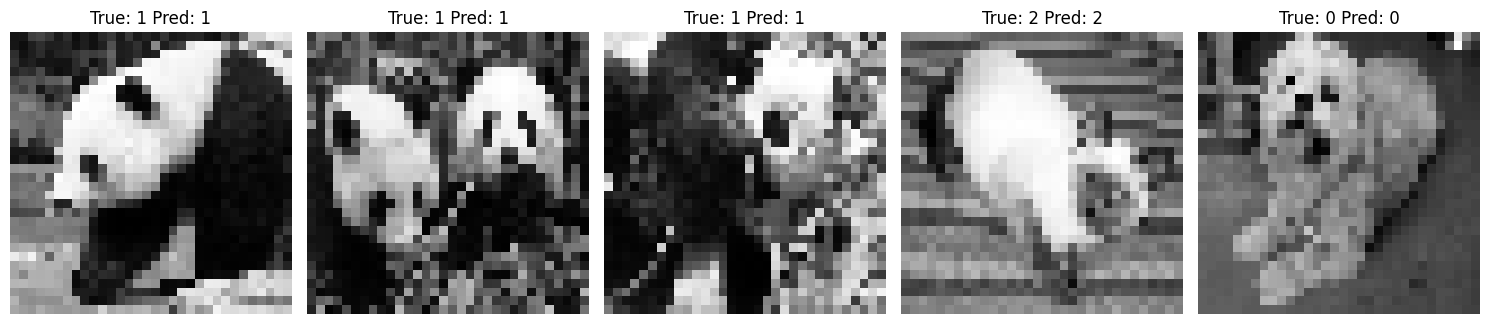


Fold 5 Top 5 Predictions (Manhattan (L1)):


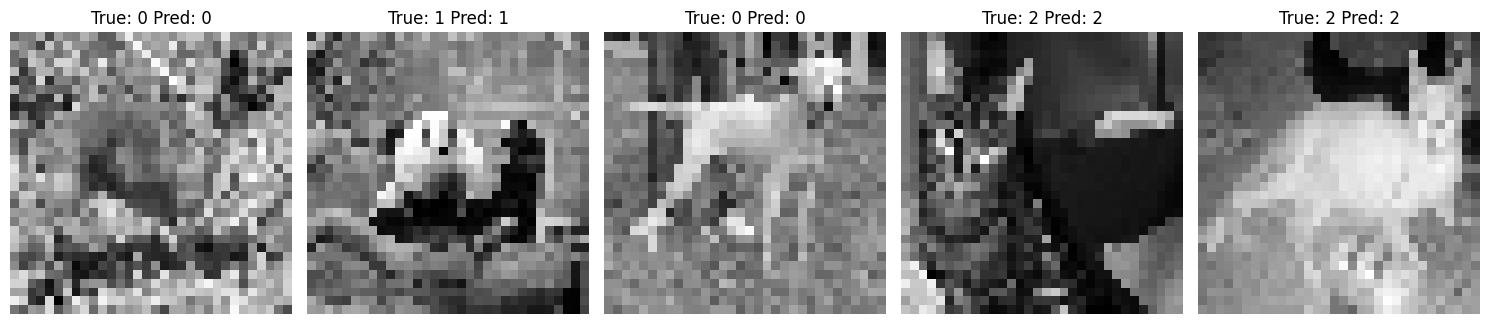

In [21]:
def get_top_5_predictions(folds, distance_function, k=1):
    top_predictions = []  # List to store the top 5 predictions
    for i in range(len(folds)):
        valid_set = folds[i]  # Select the validation set (current fold)
        train_set = [
            item for j, fold in enumerate(folds) if j != i for item in fold
        ]

        predictions = []  # List to store the prediction results for the current fold

        for valid_img in valid_set:
            distances = [
                (distance_function(valid_img[0], train_img[0]), train_img[1])
                for train_img in train_set
            ]
            distances.sort()  # Sort the distances in ascending order

            predicted_label = knn_prediction(distances, k)
            predictions.append((valid_img[0], valid_img[1], predicted_label))  # Store image, true, and predicted labels

        # Add the top 5 predictions for this fold
        top_predictions.append(sorted(predictions, key=lambda x: x[1] == x[2], reverse=True)[:5])
    return top_predictions


# Function to display the top 5 images for each fold
def show_top_5_images(folds, top_predictions, distance_name, k=1):
    for fold_idx, fold_preds in enumerate(top_predictions, start=1):
        print(f"\nFold {fold_idx} Top 5 Predictions ({distance_name}):")
        fig, axes = plt.subplots(1, 5, figsize=(15, 5))  # Create a plot with 5 subplots

        for idx, (img_data, true_label, pred_label) in enumerate(fold_preds):
            ax = axes[idx]
            # Show the image
            ax.imshow(img_data, cmap='gray')  # Display image in grayscale
            ax.set_title(f'True: {true_label} Pred: {pred_label}')
            ax.axis('off')

        plt.tight_layout()
        plt.show()


# Assume `folds` is already available and contains your cross-validation data
# Now, we get the top 5 predictions for both Euclidean (L2) and Manhattan (L1)
top_5_euclidean = get_top_5_predictions(folds, l2_distance, k=5)
top_5_manhattan = get_top_5_predictions(folds, l1_distance, k=5)

# Show the top 5 images for both distances
show_top_5_images(folds, top_5_euclidean, "Euclidean (L2)", k=5)
show_top_5_images(folds, top_5_manhattan, "Manhattan (L1)", k=5)

**Cross-Validation:**

The data is divided into multiple folds for cross-validation. In each fold, one subset is used as the validation set, and the rest are used as the training set.

For each image in the validation set, the distance to every image in the training set is calculated using either Euclidean (L2) or Manhattan (L1) distance metrics.

The distances are then sorted in ascending order (from nearest to farthest), and the k nearest neighbors are selected.

**Top 5 Predictions:**

For each fold, the predictions are evaluated by comparing the predicted label with the true label.

The predictions are then sorted by the accuracy of the prediction (whether the predicted label matches the true label).

The top 5 predictions are the images with the highest accuracy, meaning the ones that had the correct predicted labels for the most images.

Top 5 predictions are determined by sorting the images by how well the model predicted their labels.

The images that are most accurately predicted (true label matches predicted label) will appear in the top predictions, and from those, only the top 5 with the highest accuracy are chosen.